In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime

# Data Cleaning - looking through nba_players_v4.csv

In [2]:
#First let us clean the web scraped nba_players_v4 dataset
players = pd.read_csv('nba_players_v4.csv')
players.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",...,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,NaN
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",...,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,NaN
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",...,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,NaN
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",...,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,NaN
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",...,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,NaN


In [3]:
#We can see that there are a great number of columns and listed below are the definitions of each column.
players.columns

Index(['Unnamed: 0', 'url', 'name', 'active_from', 'active_to', 'position',
       'college', 'height', 'weight', 'birth_date', 'NBA_fg%', 'NBA_g_played',
       'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games', 'NCAA_ppg',
       'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg',
       'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA_efgpct'],
      dtype='object')

The 34 columns of the dataset have the following definitions...

| Column Name | Definition |
| ----------- | ---------- |
| 'Unnamed: 0' | excess column with no meaning |
| 'url' | url of the player website from basketball-reference.com/ + 'url'|
| 'name' | name of the player |
| 'active_from' | when they started playing in NBA |
| 'active_to' | when they stopped playing in NBA |
| 'position' | position that they played in the NBA |
| 'college' | college that player attended |
| 'weight' | weight of the player |
| 'birth_date' | birthdate of player |
| 'NBA_fg%' | NBA field goal percent |
| 'NBA_g_played' | NBA games played |
| 'NBA_ppg' | NBA average points per game |
| 'NBA_ft%' | NBA free throw percent |
| 'NBA_fg_per_game' | NBA average field goals per game |
| 'NBA_fga_per_game' | NBA average field goal attempts per game |
| 'NBA_ft_per_g' | NBA averagefree throws per game |
| 'NBA_fta_p_g' | NBA average free throws attempted per game | 
| ''NBA__3ptpg' | NBA average 3 point points per game | 
| 'NBA__3ptapg' | NBA average 3 point points attempted per game |
| 'NBA_efgpct' | NBA effective field goal percentage |
| 'NCAA_fgpct' | NCAA field goal percent |
| 'NCAA_games' | NCAA games played |
| 'NCAA_ppg' | NCAA average points per game |
| 'NCAA_ft' | NCAA average free throws per game |
| 'NCAA_fgpg' | NCAA averafe field goals per game |
| 'NCAA_fgapg' | NCAA average field goal attempts per game |
| 'NCAA_ftpg' | NCAA average free throws per game |
| 'NCAA_ftapg' | NCAA average free throws attempted per game |
| 'NCAA__3ptpg' | NCAA average 3 points per game |
| 'NCAA__3ptapg' | NCAA average 3 point attempted per game |
| 'NCAA__3ptpct' | NCAA 3 point percent |
| 'NCAA_efgpct' | NCAA effective field goal percent |

In [4]:
# look at the number of data points and any unique trends/patterns
players.describe()

,Unnamed: 0,active_from,active_to,weight,NBA_fg%,NBA_g_played,NBA_ppg,NBA_ft%,NBA_fg_per_game,NBA_fga_per_game,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct
count,4961.000000,4961.000000,4961.000000,4956.000000,4921.000000,4958.000000,4958.000000,4718.000000,4958.000000,4958.000000,...,3273.000000,3266.000000,3273.000000,3245.000000,3273.000000,3265.000000,2030.000000,2030.000000,2088.000000,0.0
mean,2480.000000,1987.981052,1992.189478,209.318200,0.409099,268.523598,6.392739,0.698552,2.441186,5.758088,...,13.707333,0.714054,5.094898,10.465455,2.925817,4.085850,0.912365,2.528522,0.323686,NaN
std,1432.261673,22.293679,23.050732,26.058063,0.108682,310.150670,4.761517,0.142392,1.811177,3.870075,...,4.627333,0.089792,1.804100,3.746973,1.267909,1.683406,0.802123,2.109893,0.132467,NaN
min,0.000000,1947.000000,1947.000000,114.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,0.295000,0.600000,1.200000,0.300000,0.300000,0.000000,0.000000,0.000000,NaN
25%,1240.000000,1971.000000,1974.000000,190.000000,0.367000,31.000000,2.800000,0.633000,1.100000,2.800000,...,10.600000,0.662000,3.900000,7.900000,2.100000,2.900000,0.100000,0.400000,0.298000,NaN
50%,2480.000000,1990.000000,1995.000000,210.000000,0.423000,124.000000,5.200000,0.719000,2.000000,4.900000,...,13.500000,0.722000,4.900000,10.200000,2.800000,3.900000,0.800000,2.400000,0.348000,NaN
75%,3720.000000,2007.000000,2014.000000,225.000000,0.465000,446.000000,8.700000,0.784000,3.300000,7.900000,...,16.400000,0.773000,6.100000,12.600000,3.600000,5.000000,1.500000,4.100000,0.383000,NaN
max,4960.000000,2022.000000,2022.000000,360.000000,1.000000,1611.000000,30.100000,1.000000,12.100000,23.800000,...,44.200000,1.745000,16.700000,38.100000,10.800000,14.400000,4.000000,10.800000,1.000000,NaN


In [5]:
players.isna().sum()

Unnamed: 0             0
url                    0
name                   0
active_from            0
active_to              0
position               0
college              348
height                 0
weight                 5
birth_date            18
NBA_fg%               40
NBA_g_played           3
NBA_ppg                3
NBA_ft%              243
NBA_fg_per_game        3
NBA_fga_per_game       3
NBA_ft_per_g           3
NBA_fta_p_g            3
NBA__3ptpg          1131
NBA__3ptapg         1131
NBA__3ptpct         1651
NBA_efgpct          1162
NCAA_fgpct          1716
NCAA_games          1688
NCAA_ppg            1688
NCAA_ft             1695
NCAA_fgpg           1688
NCAA_fgapg          1716
NCAA_ftpg           1688
NCAA_ftapg          1696
NCAA__3ptpg         2931
NCAA__3ptapg        2931
NCAA__3ptpct        2873
NCAA_efgpct         4961
dtype: int64

Looking at the null values, the column 'NCAA_efgpct' is null for all players.

The columns 'Unnamed: 0', 'Unnamed: 0.1', 'NCAA_efgpct' can be dropped.

It can also be seen that there are 5 missing values for weight and 18 for birthdate which should not affect our analysis as we can most likely find the values to input with a google search

In [6]:
#finding who are the ones that have missing weight values
weight_missing = players[players['weight'].isnull() == True]
weight_missing
#dropping these players since its old and they didn't play for long. 
players = players.drop(index=[2578,3043,3250,4671,4878], axis=0).reset_index()

The weights of these players cannot be found anywhere. The time that they were active is also only up to a year where growth may not have been shown among their games. The time frame in which these players played is beyond the scope of our project so we will drop these values.

In [7]:
#finding birthdays that are missing
birthday_missing = players[players['birth_date'].isnull() == True]
#dropping these rows cause we can't find the birthdays for them and their active time frame is within the same year.
birthday_missing_index = birthday_missing.index
players = players.drop(index = birthday_missing_index, axis = 0).reset_index()

After looking at the missing birthdates and heights, these players are those that have played before the 1970's which is beyond the scope of our project. Therefore, they are not needed for our analysis

In [8]:
#dropping columns
players = players.drop(columns = ['Unnamed: 0','NCAA_efgpct'], axis = 1)
players

,level_0,index,url,name,active_from,active_to,position,college,height,weight,...,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct
0,0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,...,134.0,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN
1,1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,...,75.0,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN
2,2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,...,88.0,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN
3,3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,...,64.0,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372
4,4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,...,87.0,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,4951,4956,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,NaN,6-10,266.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4935,4952,4957,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,7-1,240.0,...,63.0,3.2,0.429,1.4,2.9,0.4,1.0,NaN,NaN,NaN
4936,4953,4958,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,6-1,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4937,4954,4959,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,NaN,7-0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
players.columns

Index(['level_0', 'index', 'url', 'name', 'active_from', 'active_to',
       'position', 'college', 'height', 'weight', 'birth_date', 'NBA_fg%',
       'NBA_g_played', 'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg',
       'NBA__3ptapg', 'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games',
       'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg',
       'NCAA_ftapg', 'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct'],
      dtype='object')

In [10]:
#organize the dataframe and relabel columns
columns = ['name','height','weight','birth_date','active_from','active_to',
        'position','college','NBA_fg%', 'NBA_g_played', 'NBA_ppg',
       'NBA_ft%', 'NBA_fg_per_game', 'NBA_fga_per_game', 'NBA_ft_per_g',
       'NBA_fta_p_g', 'NBA__3ptpg', 'NBA__3ptapg', 'NBA__3ptpct', 'NBA_efgpct',
       'NCAA_fgpct', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg',
       'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA__3ptpg', 'NCAA__3ptapg',
       'NCAA__3ptpct']
players = players[columns]
players

,name,height,weight,birth_date,active_from,active_to,position,college,NBA_fg%,NBA_g_played,...,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct
0,Alaa Abdelnaby,6-10,240.0,"June 24, 1968",1991,1995,F-C,Duke,0.502,256.0,...,134.0,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN
1,Zaid Abdul-Aziz,6-9,235.0,"April 7, 1946",1969,1978,C-F,Iowa State,0.428,505.0,...,75.0,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN
2,Kareem Abdul-Jabbar,7-2,225.0,"April 16, 1947",1970,1989,C,UCLA,0.559,1560.0,...,88.0,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN
3,Mahmoud Abdul-Rauf,6-1,162.0,"March 9, 1969",1991,2001,G,LSU,0.442,586.0,...,64.0,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372
4,Tariq Abdul-Wahad,6-6,223.0,"November 3, 1974",1998,2003,F,"Michigan, San Jose State",0.417,236.0,...,87.0,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,Ante Žižić,6-10,266.0,"January 4, 1997",2018,2020,F-C,NaN,0.581,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4935,Jim Zoet,7-1,240.0,"December 20, 1953",1983,1983,C,Kent State University,0.200,7.0,...,63.0,3.2,0.429,1.4,2.9,0.4,1.0,NaN,NaN,NaN
4936,Bill Zopf,6-1,170.0,"June 7, 1948",1971,1971,G,Duquesne,0.363,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4937,Ivica Zubac,7-0,240.0,"March 18, 1997",2017,2022,C,NaN,0.588,291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#putting into consistent data types
players.dtypes

name                 object
height               object
weight              float64
birth_date           object
active_from           int64
active_to             int64
position             object
college              object
NBA_fg%             float64
NBA_g_played        float64
NBA_ppg             float64
NBA_ft%             float64
NBA_fg_per_game     float64
NBA_fga_per_game    float64
NBA_ft_per_g        float64
NBA_fta_p_g         float64
NBA__3ptpg          float64
NBA__3ptapg         float64
NBA__3ptpct         float64
NBA_efgpct          float64
NCAA_fgpct          float64
NCAA_games          float64
NCAA_ppg            float64
NCAA_ft             float64
NCAA_fgpg           float64
NCAA_fgapg          float64
NCAA_ftpg           float64
NCAA_ftapg          float64
NCAA__3ptpg         float64
NCAA__3ptapg        float64
NCAA__3ptpct        float64
dtype: object

In [12]:
#casting college column to string type
players['college'] = players['college'].astype(str)
#casting position to string type
players['position'] = players['position'].astype(str)
#casting height to int type
def height_inches(height):
    feet = int(height[0])
    inches = 0
    if len(height) == 4:
        inches = int(height[2:4] )
    if len(height) == 3:
        inches = int(height[2])
    return (feet * 12) + inches
players['height'] = players['height'].apply(height_inches)

<ipython-input-12-93fac6333ea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['college'] = players['college'].astype(str)
<ipython-input-12-93fac6333ea9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['position'] = players['position'].astype(str)
<ipython-input-12-93fac6333ea9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

## Attempting to change birthdate to an easier to read datetime

In [13]:
#Since the birthdays are written out in readable format, we want something that we can work with pandas.
players['birth_date']

0           June 24, 1968
1           April 7, 1946
2          April 16, 1947
3           March 9, 1969
4        November 3, 1974
              ...        
4934      January 4, 1997
4935    December 20, 1953
4936         June 7, 1948
4937       March 18, 1997
4938    December 19, 1919
Name: birth_date, Length: 4939, dtype: object

In [14]:
#changing written birthdates into numerical ones that we can manipulate in the dataframe
def birthdate(day):
    day = day.replace(',', '')
    day = day.lower()

    output = datetime.strptime(day, '%B %d %Y')
    return output.date()

players['updated_birth_date'] = players['birth_date'].apply(birthdate)

<ipython-input-14-79894abaa640>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['updated_birth_date'] = players['birth_date'].apply(birthdate)


In [15]:
players.dtypes

name                   object
height                  int64
weight                float64
birth_date             object
active_from             int64
active_to               int64
position               object
college                object
NBA_fg%               float64
NBA_g_played          float64
NBA_ppg               float64
NBA_ft%               float64
NBA_fg_per_game       float64
NBA_fga_per_game      float64
NBA_ft_per_g          float64
NBA_fta_p_g           float64
NBA__3ptpg            float64
NBA__3ptapg           float64
NBA__3ptpct           float64
NBA_efgpct            float64
NCAA_fgpct            float64
NCAA_games            float64
NCAA_ppg              float64
NCAA_ft               float64
NCAA_fgpg             float64
NCAA_fgapg            float64
NCAA_ftpg             float64
NCAA_ftapg            float64
NCAA__3ptpg           float64
NCAA__3ptapg          float64
NCAA__3ptpct          float64
updated_birth_date     object
dtype: object

In [16]:
#cleaning up player columns
players = players.rename(columns={'name':'player_name','NBA_fg_per_game':'NBA_fgpg',
                        'NBA_fga_per_game':'NBA_fgapg','NBA_ft_per_g':'NBA_ftpg','NBA_fta_p_g':'NBA_ftapg',
                       'NBA__3ptpg':'NBA_3ptpg','NBA__3ptapg':'NBA_3ptapg','NBA__3ptpct':'NBA_3pt%',
                       'NBA_efgpct':'NBA_efg%','NCAA_fgpct':'NCAA_fg%','NCAA__3ptpg':'NCAA_3ptpg',
                       'NCAA__3ptapg':'NCAA_3ptapg','NCAA__3ptpct':'NCAA_3pt%'})

In [17]:
#After renaming the columns, we are left with these renamed columns.
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'college', 'NBA_fg%', 'NBA_g_played',
       'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg', 'NBA_ftpg', 'NBA_ftapg',
       'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%', 'NBA_efg%', 'NCAA_fg%',
       'NCAA_games', 'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg',
       'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg', 'NCAA_3ptapg', 'NCAA_3pt%',
       'updated_birth_date'],
      dtype='object')

## Looking at the colleges that players went to

In [18]:
no_college = players[players['college'] == 'nan']
no_college

,player_name,height,weight,birth_date,active_from,active_to,position,college,NBA_fg%,NBA_g_played,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%,updated_birth_date
9,Álex Abrines,78,200.0,"August 1, 1993",2017,2019,G-F,nan,0.387,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-01
35,Alexis Ajinça,86,248.0,"May 6, 1988",2009,2017,C-F,nan,0.503,293.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-05-06
43,Furkan Aldemir,82,240.0,"August 9, 1991",2015,2015,F-C,nan,0.513,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-08-09
83,David Andersen,83,245.0,"June 23, 1980",2010,2011,C,nan,0.440,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-06-23
109,Martynas Andriuškevičius,86,240.0,"March 12, 1986",2006,2006,C,nan,0.000,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,Sun Yue,81,205.0,"November 6, 1985",2009,2009,G,nan,0.273,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-11-06
4929,Wang Zhizhi,84,255.0,"July 8, 1977",2001,2005,C,nan,0.417,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1977-07-08
4933,Paul Zipser,80,215.0,"February 18, 1994",2017,2018,G-F,nan,0.371,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-02-18
4934,Ante Žižić,82,266.0,"January 4, 1997",2018,2020,F-C,nan,0.581,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-04


In [19]:
len(no_college)

348

From looking at this subset of the dataset, we can see that there are 348 players that did not go to college who have played in the NBA. This means that these players could have went straight to the league directly from high school or are players from other countries.

## EDA / plots

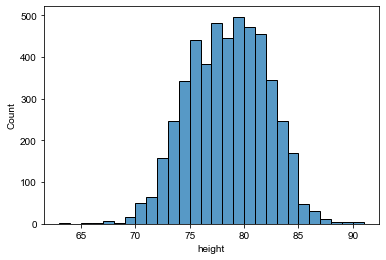

In [20]:
#distribution in height
sns.histplot(data = players['height'], bins = 28)
sns.set(rc={'figure.figsize':(8,8)})

From the graph on the distribution of heights, players heights is roughly a normal distribution. The minimum in height is around 66 inches and the maximum of heights is around 91 inches. To convert it back to feet this would be 5 feet 5 inches and 7 feet 5 inches. 

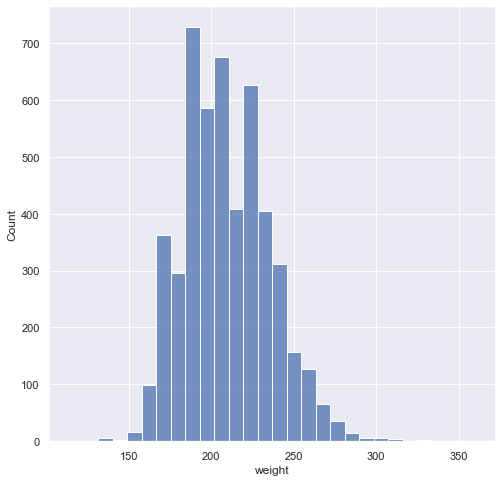

In [21]:
#distribution in weight
sns.histplot(data = players['weight'], bins = 28)
sns.set(rc={'figure.figsize':(8,8)})

Looking at the graph of the distribution in weight, it can be noticed that this is also a histogram that is normally distributed. There does seem to be a slight right skew. This is most likely due to weights being more distributed among heavier players.

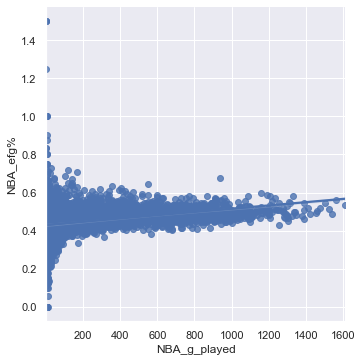

In [28]:
#relation in games played in NBA and efg% (effective field goal percent)
sns.lmplot(x = 'NBA_g_played', y = 'NBA_efg%', data = players)

Plotting the NBA games that players have played against their NBA effective field goal percentage shows that there is a linear correlation between these two variables. This can mean that as players get more experience playing games that they get a higher percentage. To further analyze this, we will look at their scoring as well.

In [42]:
players.iloc[585]

player_name               Kobe Bryant
height                             78
weight                          212.0
birth_date            August 23, 1978
active_from                      1997
active_to                        2016
position                          G-F
college                           nan
NBA_fg%                         0.447
NBA_g_played                   1346.0
NBA_ppg                          25.0
NBA_ft%                         0.837
NBA_fgpg                          8.7
NBA_fgapg                        19.5
NBA_ftpg                          6.2
NBA_ftapg                         7.4
NBA_3ptpg                         1.4
NBA_3ptapg                        4.1
NBA_3pt%                        0.329
NBA_efg%                        0.482
NCAA_fg%                          NaN
NCAA_games                        NaN
NCAA_ppg                          NaN
NCAA_ft                           NaN
NCAA_fgpg                         NaN
NCAA_fgapg                        NaN
NCAA_ftpg   

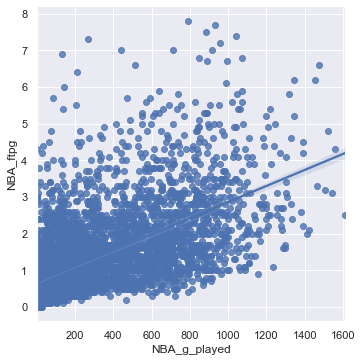

In [32]:
#correlation between games played and free throws
sns.lmplot(x = 'NBA_g_played', y = 'NBA_ftpg', data = players)

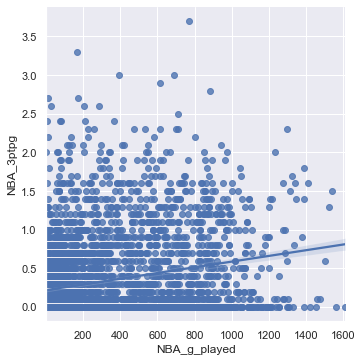

In [37]:
#correlation between games played and 3 point shots
sns.lmplot(x = 'NBA_g_played', y = 'NBA_3ptpg', data = players)

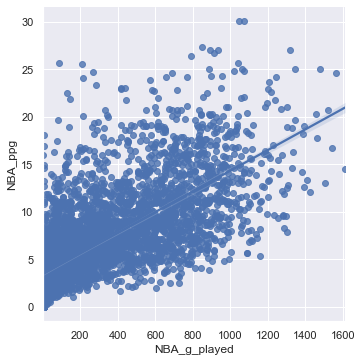

In [44]:
#correlation between games played and points scored overall
sns.lmplot(x = 'NBA_g_played', y = 'NBA_ppg', data = players)

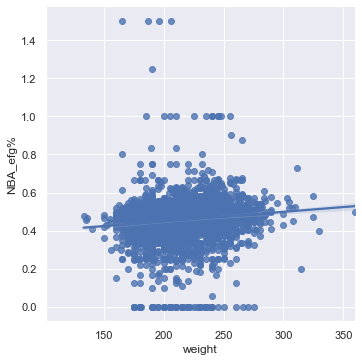

In [23]:
#relation between weight and efg%
sns.lmplot(x = 'weight', y = 'NBA_efg%', data = players)

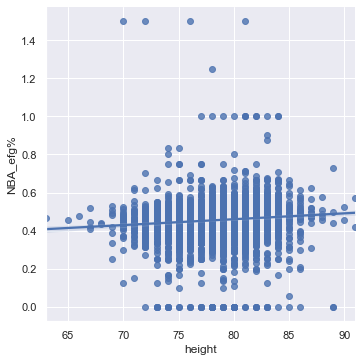

In [46]:
#relation between height and efg%
sns.lmplot(x = 'height', y = 'NBA_efg%', data = players)

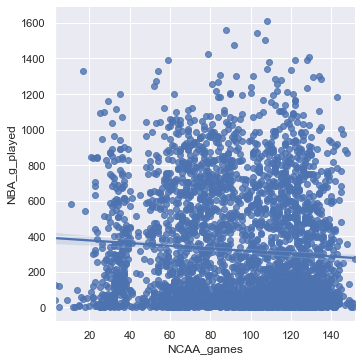

In [47]:
#relation between college games played and NBA
sns.lmplot(x = 'NCAA_games', y = 'NBA_g_played', data = players)

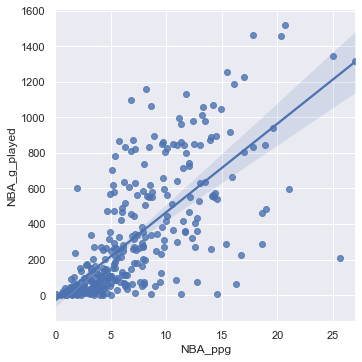

In [55]:
#relation between players that did not go to college and the number of games that they played in NBA
sns.lmplot(x = 'NBA_ppg',y = 'NBA_g_played',data = no_college)

### Does the position of the player affect how often they play?

In this part, we wanted to look at whether or not playing a particular position influneces the frequency that a player is put in. How often a player is put into the game determines how often they can play which alters the chances they have at scoring more/less as compared to other players.

<AxesSubplot:xlabel='position', ylabel='NBA_g_played'>

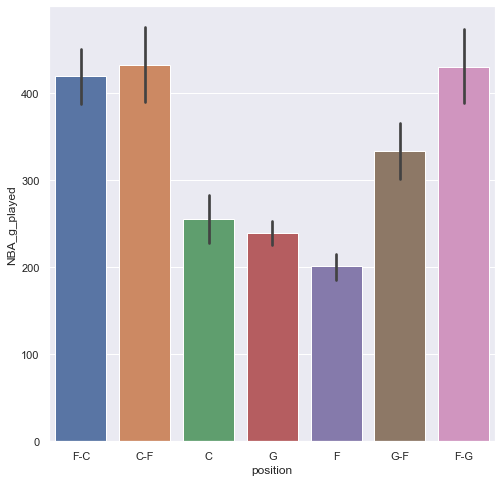

In [45]:
sns.barplot(x ='position', y = 'NBA_g_played', data = players)

<AxesSubplot:xlabel='position', ylabel='NCAA_games'>

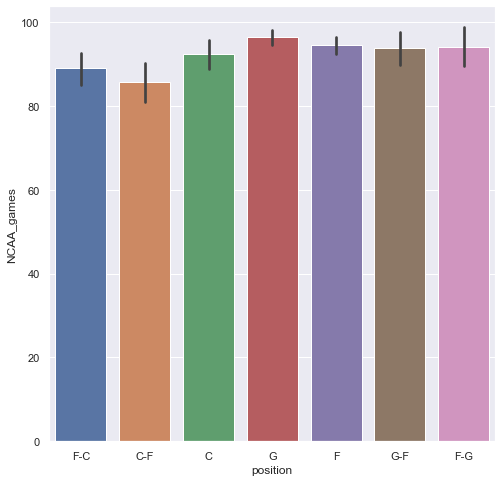

In [27]:
sns.barplot(x='position', y = 'NCAA_games', data = players)

We can see that the position of players in the NBA is not as uniform as when they play in college. There is a uniform distribution among college player positions and the number of games whereas, F-C, C-F, F-G play more than the other positions in the NBA. 